In [1]:
import numpy as np                                       # fast vectors and matrices
import matplotlib.pyplot as plt                          # plotting
from scipy import fft, ifft, fftpack

from IPython.display import Audio

from intervaltree import Interval,IntervalTree

from helperfunction import Waveform

%matplotlib inline

# Generate audio from spectrogram

In [13]:
f = 10  # Frequency, in cycles per second, or Hertz
fs = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * fs, endpoint=False)
x = np.sin(f * 2 * np.pi * t)/(np.exp(t*2)+1)

window_size = 100    # fourier window size
d = 5              # number of features              # number of distinct notes
stride = 50          # samples between windows
wps = fs/float(stride)   # windows/second
n = int((x.shape[0]-stride)/stride)


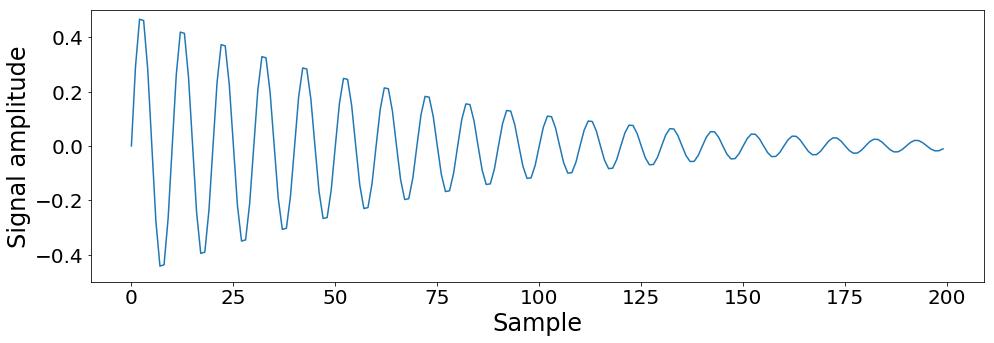

In [14]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(x)
ax.set_xlabel('Sample',size=24)
ax.set_ylabel('Signal amplitude',size=24);
ax.set_ylim(-0.5,0.5)
ax.tick_params(labelsize=20)

In [15]:
mydata = Waveform(x,window_size,stride,length=5,fs=100)

The audio has only 2.000 seconds 
Setting the lenght to the maximum audio lenght


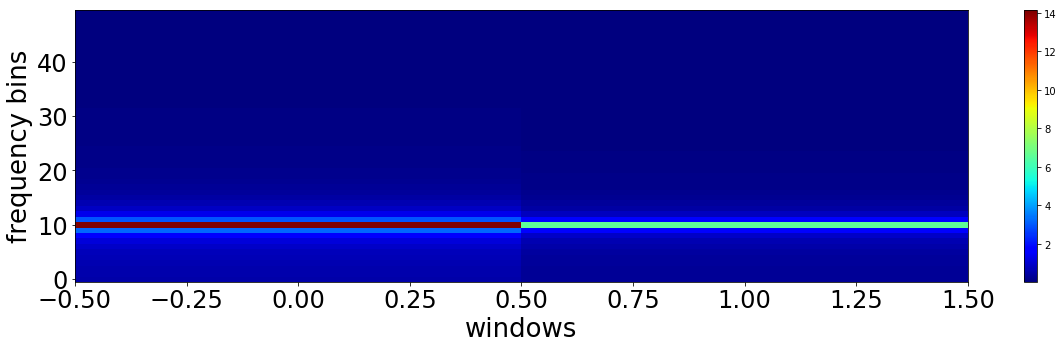

In [16]:
mydata.show_spectrogram(frequency_range=(0,50))

In [17]:
Xfft = np.empty((n,window_size),dtype='complex128' ) # Storing audio info for inverse fft       
Xs = np.empty((n,window_size)) # This container of spectrogram will be used in inverse fft  
X_sec = []

for i in range(Xs.shape[0]):
        X_sec.append(x[i*stride:i*stride+window_size])
        Xfft[i] = fft(X_sec[i])
        Xs[i] = np.abs(Xfft[i]) # Getting Amplitude from fft
        
X_sec = np.array(X_sec)

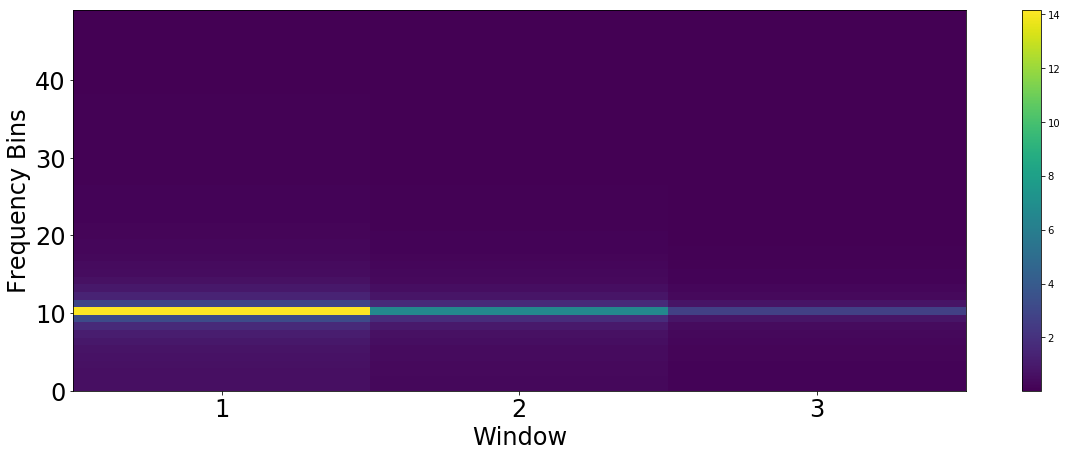

In [18]:
freq = fftpack.fftfreq(window_size, 1/fs) # Required to get the correct y axis
valid_freq = Xs.shape[1]//2 # Index for removing duplicated signal

fig = plt.figure(figsize=(20,7))
plt.imshow(Xs.T[:valid_freq],aspect='auto', extent=[0.5,0.5+Xs.shape[0],freq.max(),0])
plt.gca().invert_yaxis()
plt.colorbar() 
fig.axes[0].set_ylabel('Frequency Bins',size=24)
fig.axes[0].set_xlabel('Window',size=24)
fig.axes[0].tick_params(axis='x',labelsize=24)
fig.axes[0].tick_params(axis='y',labelsize=24)

plt.locator_params(axis="x",nbins=3)

# Window 1

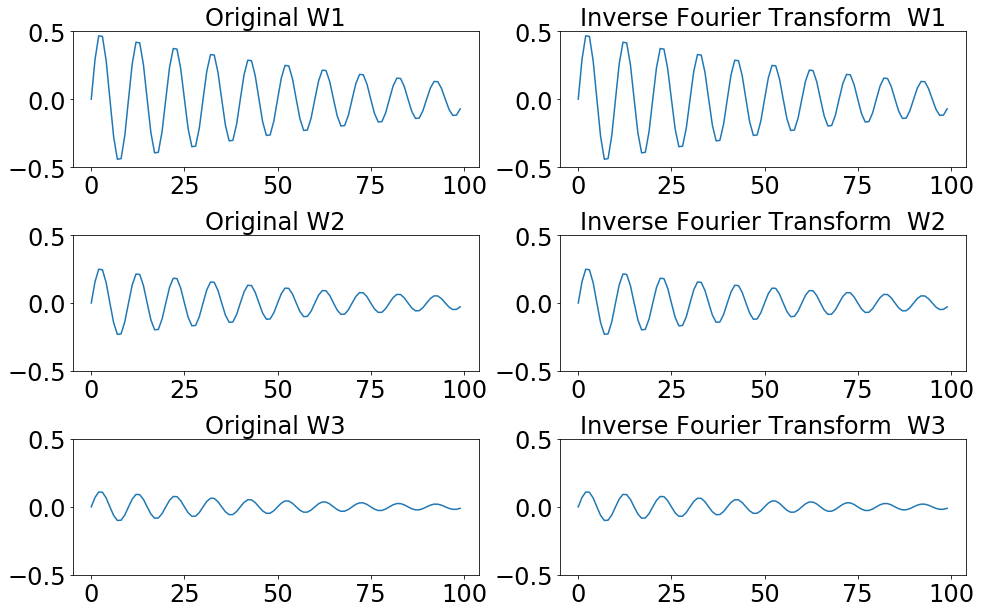

In [19]:
fig, ax = plt.subplots(3,2, figsize=(16,10))
fig.subplots_adjust(hspace=0.5)
for i in range(X_sec.shape[0]):
    
    ax[i,0].plot(X_sec[i])
    ax[i,0].set_ylim(-0.5,.5)
    ax[i,0].tick_params(axis="both",labelsize=24)
    ax[i,0].set_title("Original W{}".format(i+1), fontsize=24)

    ax[i,1].plot(ifft(Xfft[i]).real)
    ax[i,1].set_ylim(-.5,.5)
    ax[i,1].tick_params(axis="both",labelsize=24)
    ax[i,1].set_title("Inverse Fourier Transform  W{}".format(i+1), fontsize=24)

In [20]:
Xfft = mydata.get_Xfft()

IndexError: index 3 is out of bounds for axis 0 with size 2

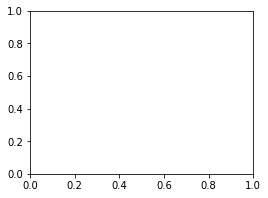

In [21]:
i=3

fig, ax = plt.subplots(1,1, figsize=(4,3))
fig.subplots_adjust(hspace=0.5)

t = np.arange(i*stride,i*stride+window_size,1)
ax.plot(t,ifft(Xfft[i]).real)
ax.set_ylim(-.5,.5)
ax.tick_params(axis="both",labelsize=20)
ax.get_yaxis().set_visible(False)
plt.locator_params(axis="x",nbins=5)